# Contours, frontière de décision

Afficher une frontière de décision est une opération assez complexe dédiée au problème jouet en 2D. C'est un outil important pour bien comprendre comment fonctionne un classifieur de données.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline # %matplotlib notebook

UsageError: unrecognized arguments: # %matplotlib notebook


In [2]:
# definition d'un dataset

def dataset_gaussian( napp=500, ntest=500, sigma=0.5):
    mu = 2
    x = np.vstack((np.random.randn(napp,2)*sigma+mu, np.random.randn(napp,2)*sigma-mu));
    y = np.vstack((np.ones((napp,1)), np.ones((napp,1))*-1));

    xtest = np.vstack((np.random.randn(ntest,2)*sigma+mu, np.random.randn(ntest,2)*sigma-mu));
    ytest = np.vstack((np.ones((ntest,1)), np.ones((ntest,1))*-1));
    return x,y,xtest,ytest
# apprentissage d'une fonction de décision linéaire (Cours 9/10 MAPSI)
def linear_decision_mc(xapp, yapp):
    return np.linalg.solve(xapp.T.dot(xapp), xapp.T.dot(yapp))

## Génération d'un jeu de données et construction d'un classifieur (MAPSI séance 9/10)

* Générer 2 gaussiennes correspondant à 2 classes
* Afficher les points (distinguer les deux classes et choisir deux couleurs


In [3]:
# ATTENTION AUX NOTATIONS
# x = points observés en 2D
# y = étiquettes de classification +1/-1
# w = paramètre d'un modèle de classification linéaire (MAPSI 9)
x,y,xtest,ytest = dataset_gaussian( )

plt.figure()
plt.plot(x[y[:,0]>0,0], x[y[:,0]>0,1], 'r+')
plt.plot(x[y[:,0]<0,0], x[y[:,0]<0,1], 'bo')


In [4]:
# apprentissage du modèle
w = linear_decision_mc(x,y)
print("modèle : ",w)

modèle :  [[0.23129991]
 [0.25436169]]


## Tracé de la frontière de décision

La frontière de décision repose sur une fonction de décision $f(x)$

### Calcul du modèle sur une grille pour estimer la valeur de $f(x)$ sur tout l'espace

1. Construction d'une grille régulière sur l'espace d'analyse
 - l'espace d'analyse sera déduit des valeurs min et max présents dans les données
1. Evaluation de la fonction de décision sur tous les points de la grille
1. Interpolation de l'ensemble des points pour lesquels $f(x) = \alpha$
1. Affichage de l'ensemble de ces points [les deux dernières opérations sont combinées]

In [5]:
# fonction de création d'une grille
def mesh(x,n=30):
    """
    Creation d'un maillage à partir d'un ensemble de points 2D
    """
    mmin = x.min(0)   # recuperation du min de chaque colonne
    mmax = x.max(0)   # recuperation du max de chaque colonne
    xgrid1,xgrid2 = np.meshgrid(np.linspace(mmin[0],mmax[0],n), 
                        np.linspace(mmin[1],mmax[1],n) )
    return np.hstack((np.reshape(xgrid1,(n*n,1)), np.reshape(xgrid2,(n*n,1))))


# construction d'une grille réguliere de point sur l'espace 2D
ngrid = 30               # finesse de la grille
xgrid = mesh(x,ngrid)    # ou simplement xgrid = mesh(x)
# affichage de la grille
plt.figure()
plt.plot(xgrid[:,0],xgrid[:,1],'+') # on voit que l'espace est entièrement couvert

In [6]:
# Evaluation de la fonction de décision sur tous les points
ygrid = xgrid.dot(w);

# affichage du nuage de points avec une altitude correspondant à la fonction d'évaluation
fig = plt.figure()
ax = fig.gca(projection='3d')                              # déclarer la 3D
ax.scatter(xgrid[:,0],xgrid[:,1], ygrid)                   # fonction d'affichage d'un nuage de point

ax.scatter(x[y[:,0]>0,0],x[y[:,0]>0,1], 0, color ='r')     # En 3D: coordz = 0
ax.scatter(x[y[:,0]<0,0],x[y[:,0]<0,1], 0, color = 'b') 

# problème = l'affichage ne gère pas la profondeur... Pas de zbuffer !



(900, 2)


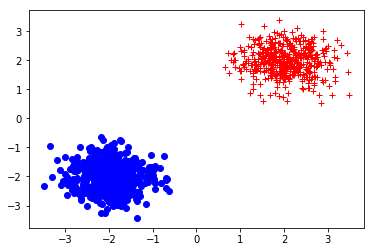

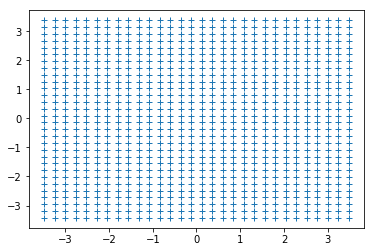

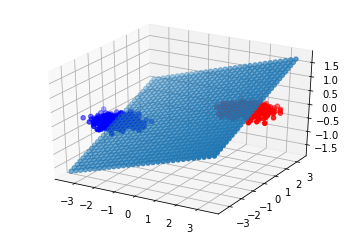

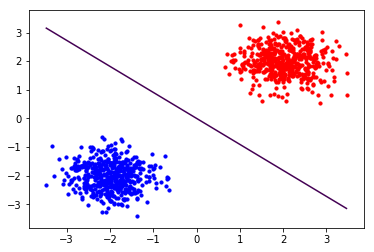

In [7]:
# il reste à trouver les points pour lesquels f(x)=0 [=interpolation]
print(xgrid.shape)

n = int(np.sqrt(xgrid.shape[0]))       # hypothèse d'une grille carrée
xgrid1 = xgrid[:,0].reshape((n,n));    # Dim1: retour à une forme de grille
xgrid2 = xgrid[:,1].reshape((n,n));    # Dim2: retour à une forme de grille   
ygridS = ygrid.reshape((n,n));         # Eval: retour à une forme de grille   

fig = plt.figure()
ax = fig.gca()    
ax.contour(xgrid1,xgrid2, ygridS, [0]) # Isocontour d'intérêt = 0
ax.scatter(x[y[:,0]>0,0],x[y[:,0]>0,1],s=10,color='r')   # pts classe 1
ax.scatter(x[y[:,0]<0,0],x[y[:,0]<0,1],s=10,color='b') # pts classe -1

plt.show()